In [6]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('gapminder_data_graphs.csv')

# Data Cleaning

country          0
continent        0
year             0
life_exp         0
hdi_index      112
co2_consump      4
gdp             42
services         0
dtype: int64

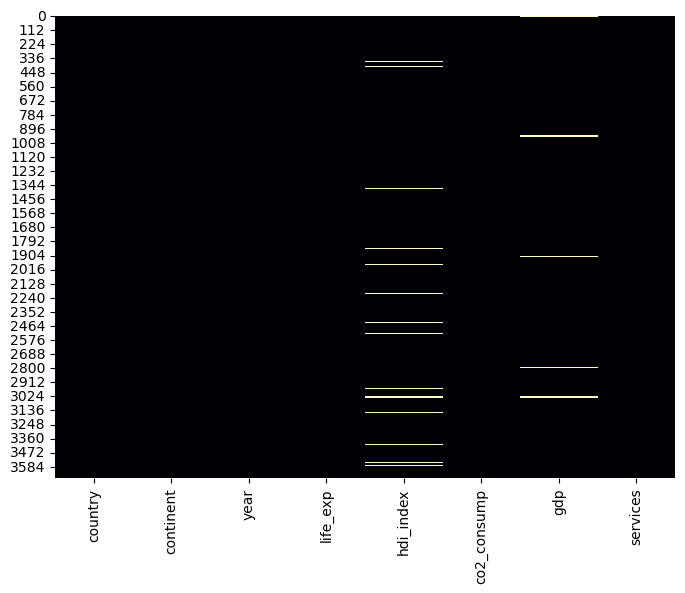

In [8]:
plt.figure(figsize = (8,6))
sns.heatmap(df.isnull(), cbar=False , cmap = 'magma')

df.isnull().sum()

In [22]:
# affichage des villes et années avec hdi_index manquante
df[df['hdi_index'].isna()][['country', 'year']]

,country,year
63,Angola,1998
189,Bahamas,1998
190,Bahamas,1999
357,Bhutan,1998
358,Bhutan,1999
...,...,...
3572,Vanuatu,2000
3573,Vanuatu,2001
3574,Vanuatu,2002
3575,Vanuatu,2003


Il est logique qu'il manque la valeur de l'indice de développement humain pour certains pays. Dans les années données, certains d'entre eux étaient en guerre ou autre evenement qui pourraient empecher d'avoir cette données.

In [24]:
df[df['gdp'].isna()][['country', 'year']]

,country,year
0,Afghanistan,1998
1,Afghanistan,1999
2,Afghanistan,2000
3,Afghanistan,2001
945,Djibouti,1998
946,Djibouti,1999
947,Djibouti,2000
948,Djibouti,2001
949,Djibouti,2002
950,Djibouti,2003


Dans le même cas que précédemment, ces pays manque de données pour l'indice de développement humain car ils étaient dans des situation politique ou humaines compliquées dans les années données.

In [25]:
df[df['co2_consump'].isna()][['country', 'year']]

,country,year
3276,Timor-Leste,1998
3277,Timor-Leste,1999
3278,Timor-Leste,2000
3279,Timor-Leste,2001


Avant 2002, le Timor oriental était une province de l'Indonésie. Nous n'avons donc pas de données pour cette période.

In [26]:
# suppression des ligne avec des valeurs manquantes
df.dropna(inplace = True)

# vérification
df.isnull().sum()

country        0
continent      0
year           0
life_exp       0
hdi_index      0
co2_consump    0
gdp            0
services       0
dtype: int64

# Analyse

In [29]:
# moyenne des données par pays
df_without_year = df.drop('year', axis = 1)
df_mean = df_without_year.groupby('country').mean(numeric_only=True)
df_mean

,life_exp,hdi_index,co2_consump,gdp,services
country,,,,,
Afghanistan,59.911765,0.461059,0.194371,482.176471,31.135294
Albania,77.080952,0.731095,1.395476,3111.428571,37.328571
Algeria,73.571429,0.697095,3.241905,3739.047619,56.228571
Angola,58.830000,0.498700,1.052550,3517.500000,47.320000
Argentina,75.404762,0.811905,4.259524,12246.190476,76.057143
...,...,...,...,...,...
Vanuatu,64.564286,0.591000,0.463071,2798.571429,30.057143
Vietnam,73.071429,0.643095,1.315286,1539.904762,28.566667
Yemen,66.171429,0.478571,0.816429,2243.333333,53.690476
